In [11]:
import json
import random

with open("test.json") as f:
    test_data = json.load(f)

with open("train.json") as f:
    train_data = json.load(f)


all_data = train_data + test_data


# Shuffle and create new train/test sets with a fixed seed for reproducibility
random.seed(42)
random.shuffle(all_data)

# Calculate split sizes (80% train, 20% test)
total_samples = len(all_data)
train_size = int(0.8 * total_samples)

# Create new train and test sets
new_train_data = all_data[:train_size]
new_test_data = all_data[train_size:]

print(f"Original data: {len(train_data)} train samples, {len(test_data)} test samples")
print(f"New data: {len(new_train_data)} train samples, {len(new_test_data)} test samples")

# Optional: Save the new datasets to files
with open("new_train.json", "w") as f:
    json.dump(new_train_data, f, indent=4)
# # 
with open("new_test.json", "w") as f:
    json.dump(new_test_data, f, indent=4)



Original data: 800 train samples, 200 test samples
New data: 800 train samples, 200 test samples


Train data intensity distribution:


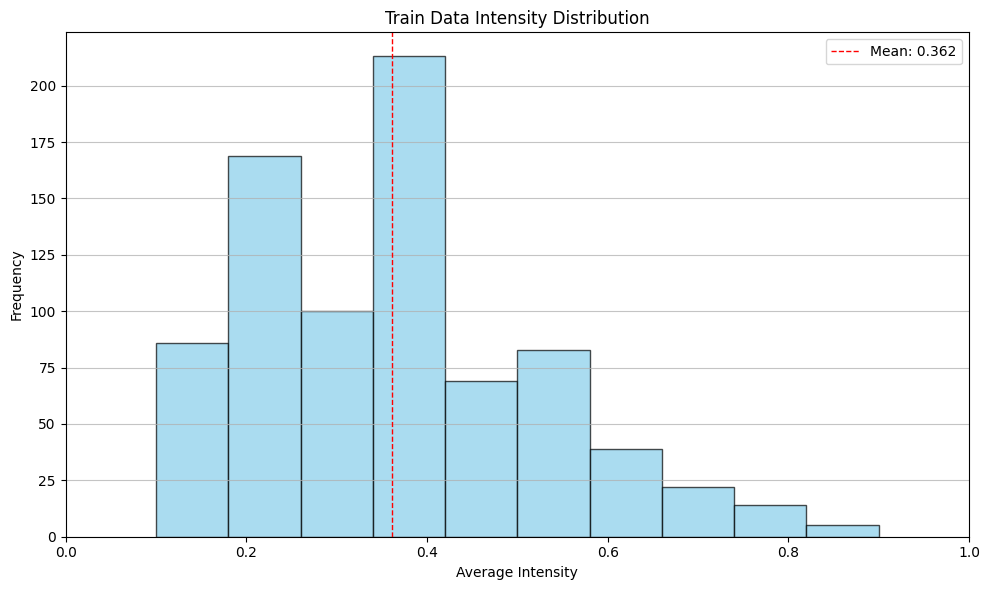


Test data intensity distribution:


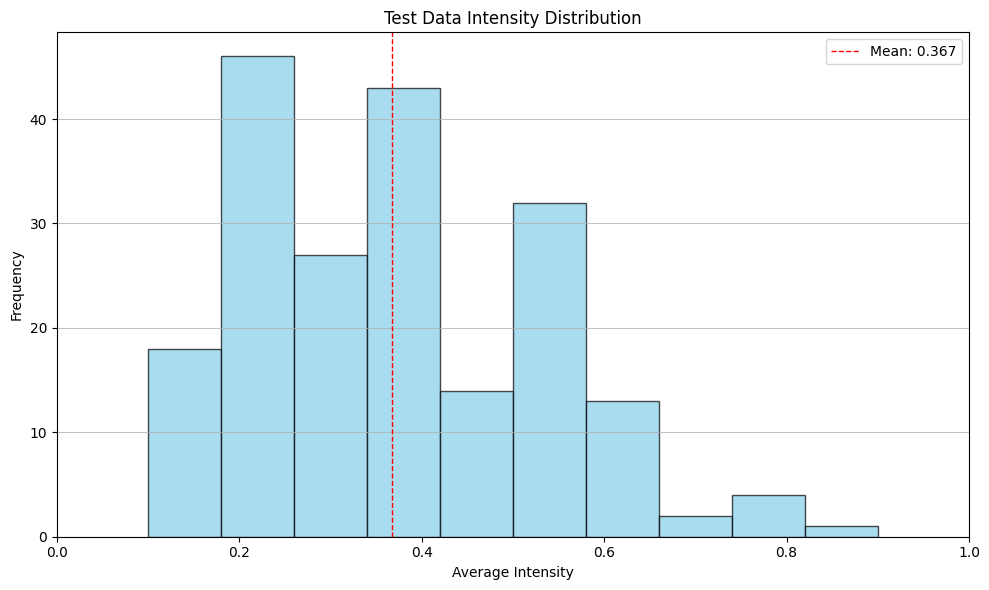

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_intensity_distribution(data_json, title="Intensity Distribution", bins=10):
    """
    Plot the distribution of emotion intensities from the dataset.
    
    Args:
        data_json: The loaded JSON data containing premise and hypothesis with emotion info
        title: Title for the plot
        bins: Number of bins for the histogram
    """
    intensities = []
    for item in data_json:
        prem_intensity = item['premise']['emotion_info']['intensity']
        hyp_intensity = item['hypothesis']['emotion_info']['intensity']
        avg_intensity = (prem_intensity + hyp_intensity) / 2
        intensities.append(avg_intensity)
    
    plt.figure(figsize=(10, 6))
    plt.hist(intensities, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Average Intensity')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.xlim(0, 1)  # Fix x-axis between 0 and 1
    
    # Add mean line
    if intensities:
        mean = sum(intensities)/len(intensities)
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, 
                   label=f'Mean: {mean:.3f}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return intensities

# Example usage
print("Train data intensity distribution:")
train_intensities = plot_intensity_distribution(new_train_data, "Train Data Intensity Distribution")

print("\nTest data intensity distribution:")
test_intensities = plot_intensity_distribution(new_test_data, "Test Data Intensity Distribution")
